In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


# Linear Regression (House Price Prediction)


# Import Important Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score , r2_score , mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Data Understanding

In [51]:
house_data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
print(house_data.shape)
house_data.head(10)

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [52]:
house_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15829,-122.43,37.75,52.0,1970.0,495.0,871.0,474.0,4.0625,355600.0,NEAR BAY
9218,-120.27,37.12,42.0,1142.0,236.0,597.0,210.0,1.7279,52300.0,INLAND
35,-122.27,37.83,49.0,1215.0,282.0,570.0,264.0,1.4861,97200.0,NEAR BAY
14470,-117.27,32.84,26.0,3940.0,657.0,1180.0,600.0,6.1025,500001.0,NEAR OCEAN
17745,-121.76,37.30,6.0,3526.0,559.0,1378.0,491.0,6.1463,335500.0,<1H OCEAN


In [53]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [54]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


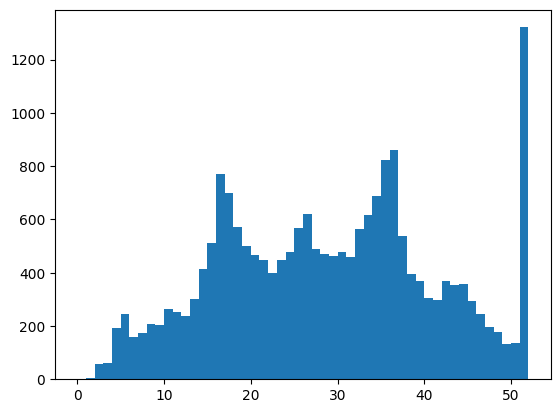

In [55]:
bins = np.arange(0 , house_data["housing_median_age"].max() + 1 , 1)
plt.hist(data = house_data , x = "housing_median_age" , bins = bins);

In [56]:
house_data["housing_median_age"].skew()

0.060330637599136865

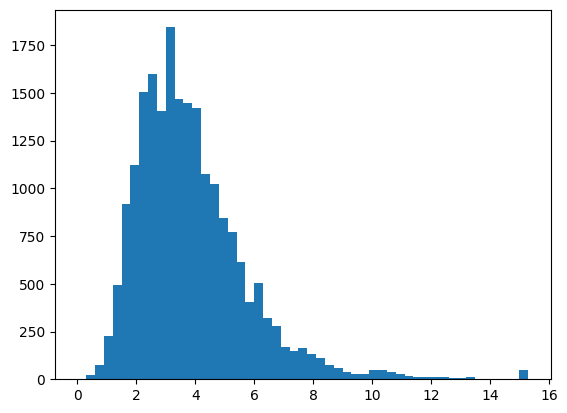

In [57]:
bins = np.arange(0 , house_data["median_income"].max() + 0.3 , 0.3)
plt.hist(data = house_data , x = "median_income" , bins = bins);

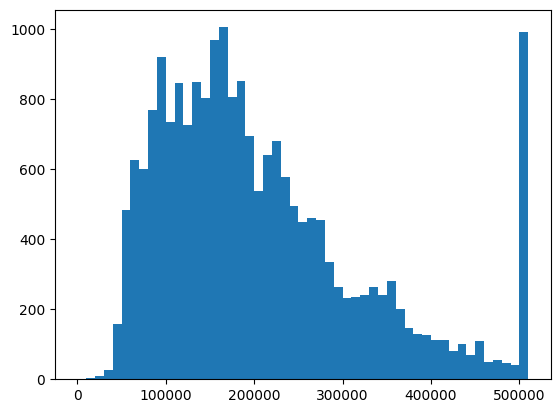

In [58]:
bins = np.arange(0 , house_data["median_house_value"].max() + 10000 , 10000)
plt.hist(data = house_data , x = "median_house_value" , bins = bins);

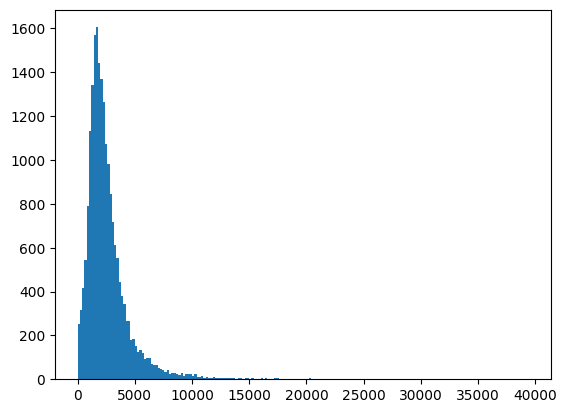

In [59]:
bins = np.arange(0 , house_data["total_rooms"].max() + 200 , 200)
plt.hist(data = house_data , x = "total_rooms" , bins = bins);

In [60]:
house_data["total_rooms"].skew()

4.147343450632158

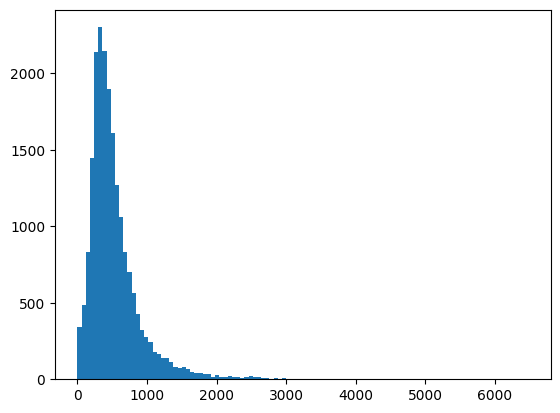

In [61]:
bins = np.arange(0 , house_data["total_bedrooms"].max() + 60 , 60)
plt.hist(data = house_data , x = "total_bedrooms" , bins = bins);

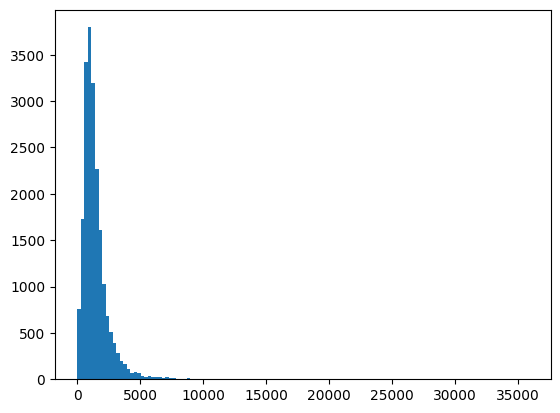

In [62]:
bins = np.arange(0 , house_data["population"].max() + 280 , 280)
plt.hist(data = house_data , x = "population" , bins = bins);

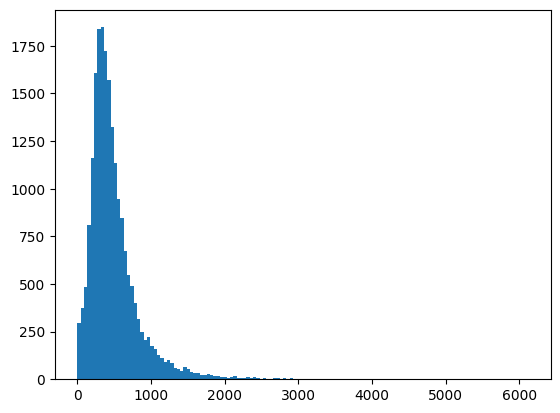

In [63]:
bins = np.arange(0 , house_data["households"].max() + 45 , 45)
plt.hist(data = house_data , x = "households" , bins = bins);

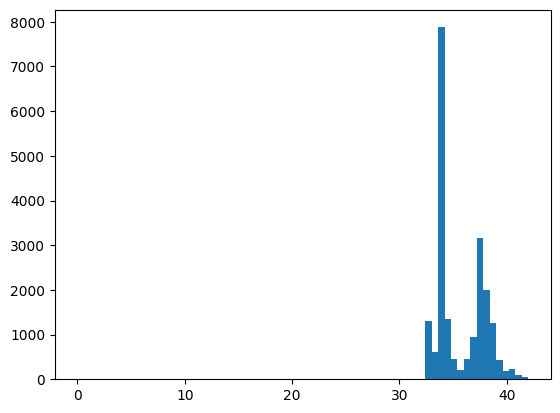

In [64]:
bins = np.arange(0 , house_data["latitude"].max() + 0.6 , 0.6)
plt.hist(data = house_data , x = "latitude" , bins = bins);

# Data Cleaning and Preprocessing

### Hundle Missing Vlaues


In [65]:
print(house_data.isnull().sum() , "\n")
percentage = house_data.isnull().sum().sum() / house_data.shape[0] * 200
print(percentage)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64 

2.005813953488372


##### Number of null rows is very small compare to all rows so we will drop it

In [66]:
house_data.dropna(inplace = True)
house_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Hundle Outliers

<Axes: xlabel='total_rooms'>

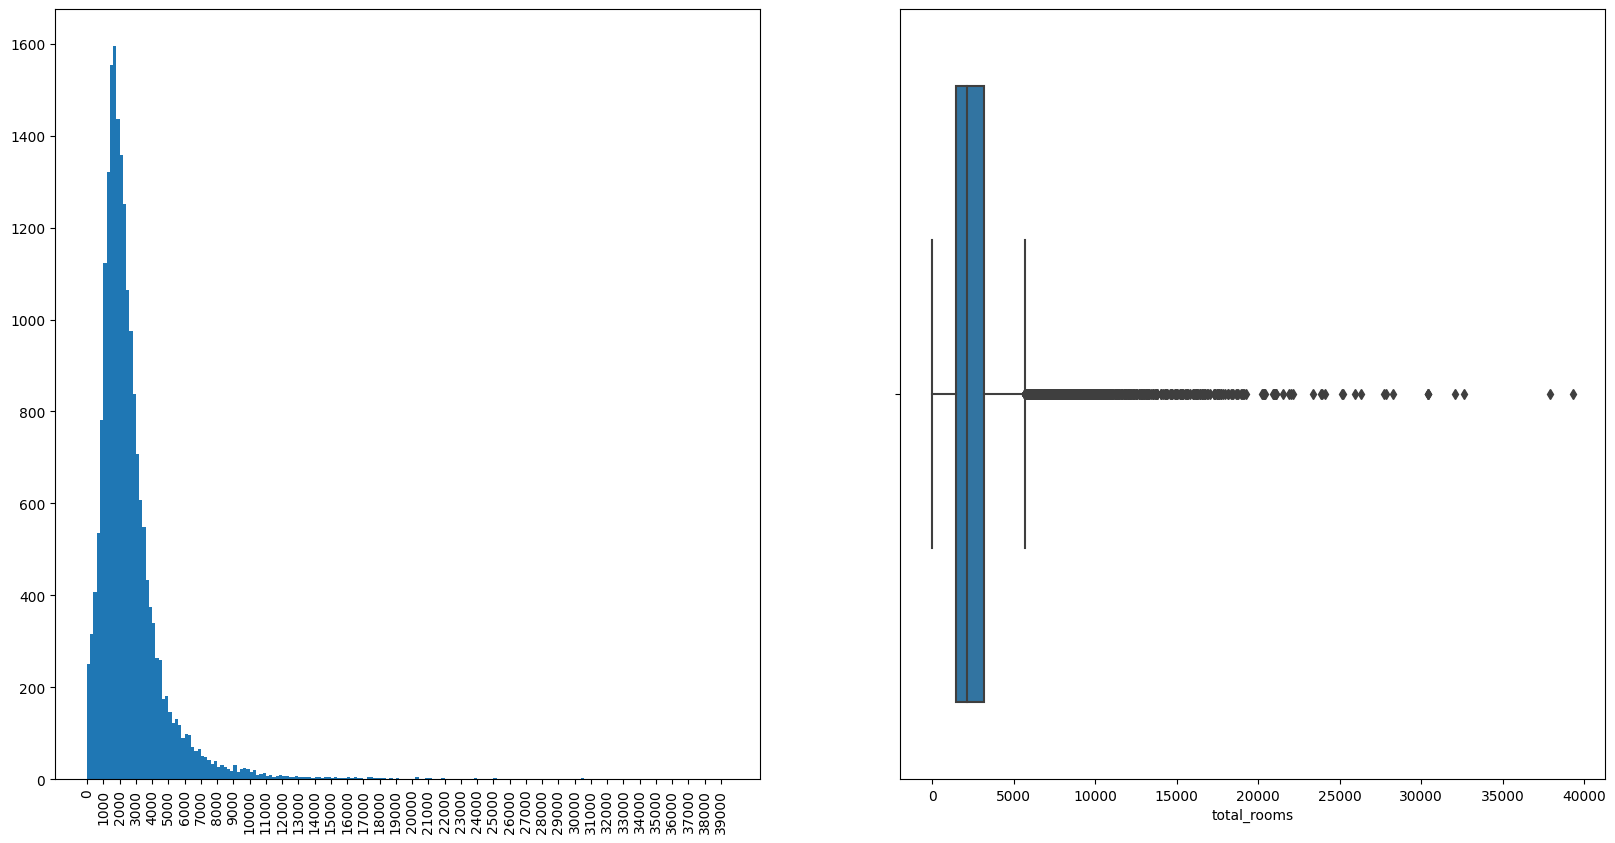

In [67]:
plt.figure(figsize = [20,10])
plt.subplot(1 , 2 , 1)

bins = np.arange(0 , house_data["total_rooms"].max() + 200 , 200)
plt.hist(data = house_data , x = "total_rooms" , bins = bins)
plt.xticks(np.arange(0 , 40000 , 1000))
plt.xticks(rotation = 90);

plt.subplot(1 , 2 , 2)

sns.boxplot(x = house_data["total_rooms"])

count    20400.000000
mean      2600.075588
std       1979.880141
min          2.000000
25%       1448.750000
50%       2125.000000
75%       3136.000000
max      19234.000000
Name: total_rooms, dtype: float64

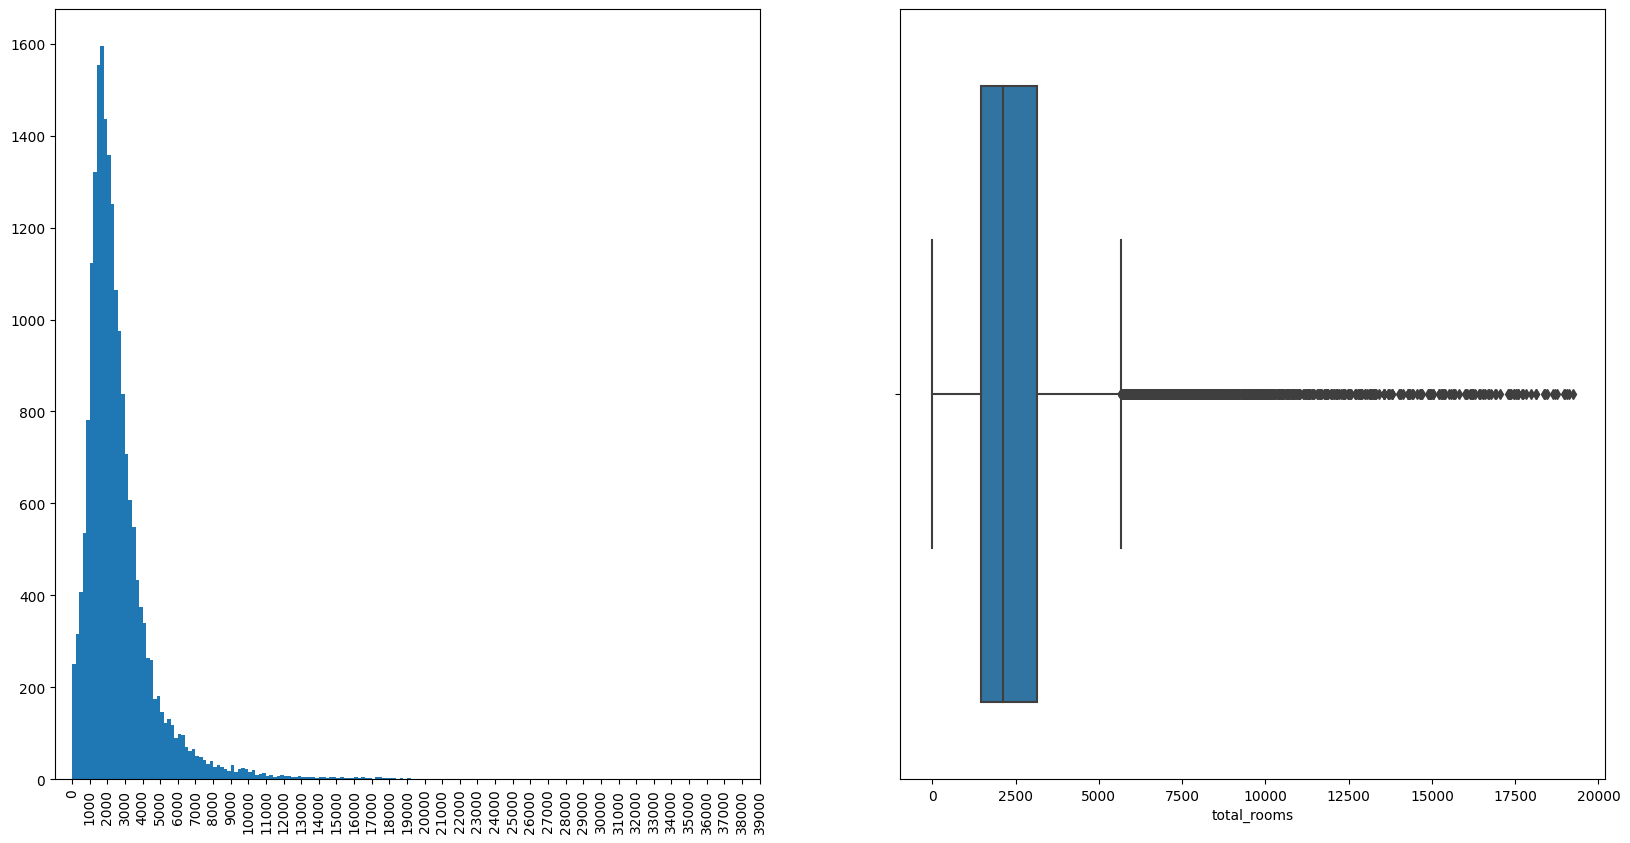

In [68]:
out_index = house_data[house_data["total_rooms"] > 20000].index
house_data = house_data.drop(out_index , axis = 0) 
plt.figure(figsize = [20,10])
plt.subplot(1 , 2 , 1)

bins = np.arange(0 , house_data["total_rooms"].max() + 200 , 200)
plt.hist(data = house_data , x = "total_rooms" , bins = bins)
plt.xticks(np.arange(0 , 40000 , 1000))
plt.xticks(rotation = 90);

plt.subplot(1 , 2 , 2)

sns.boxplot(x = house_data["total_rooms"])
house_data["total_rooms"].describe()

<Axes: xlabel='total_bedrooms'>

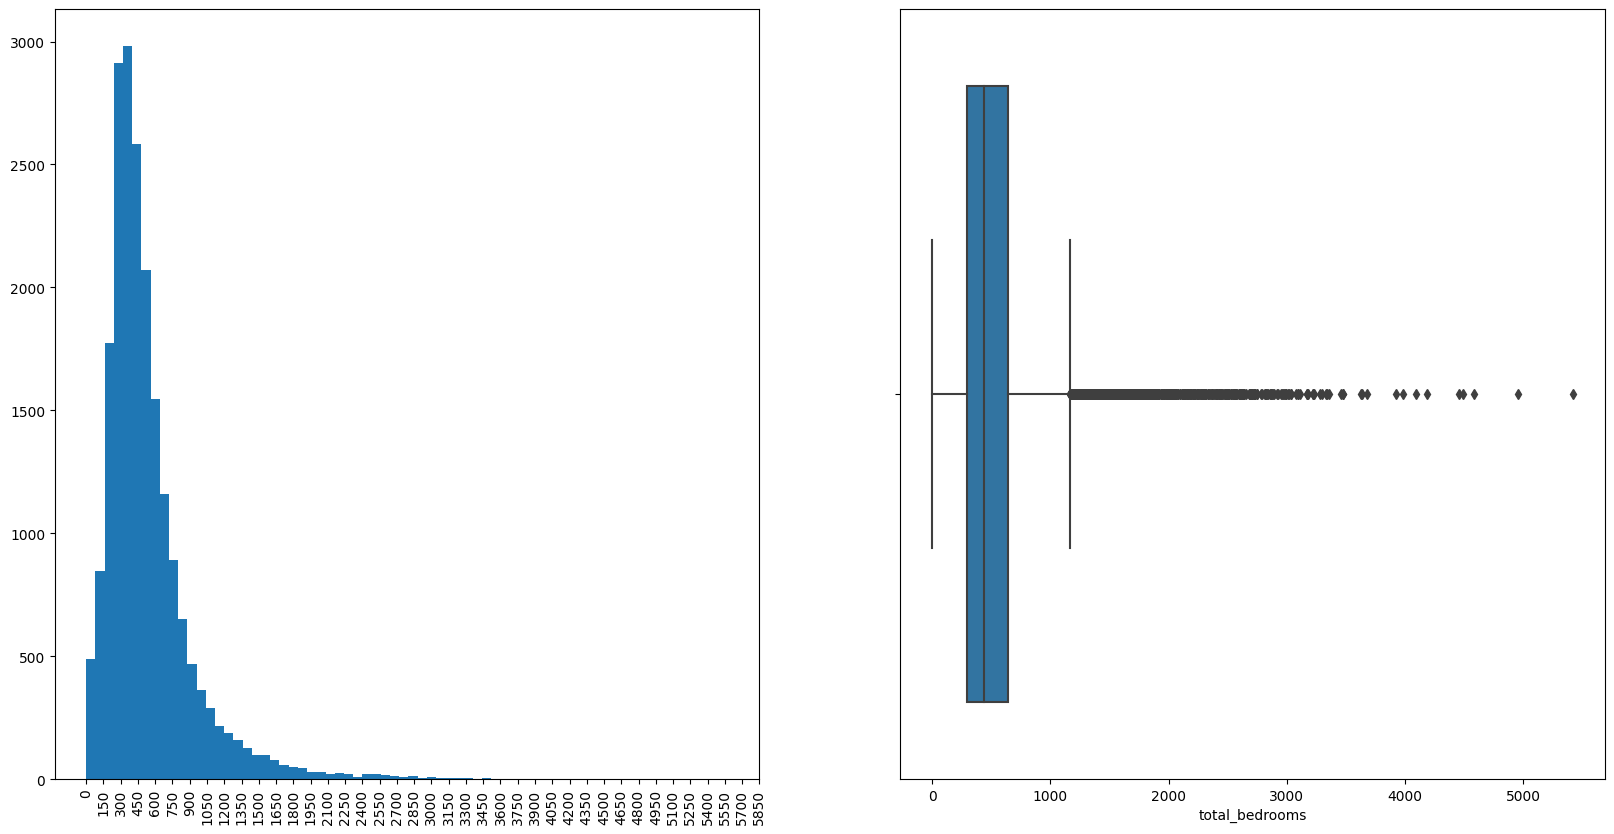

In [69]:
plt.figure(figsize = [20,10])
plt.subplot(1 , 2 , 1)

bins = np.arange(0 , house_data["total_bedrooms"].max() + 80 , 80)
plt.hist(data = house_data , x = "total_bedrooms" , bins = bins)
plt.xticks(np.arange(0 , 6000 , 150))
plt.xticks(rotation = 90);

plt.subplot(1 , 2 , 2)

sns.boxplot(x = house_data["total_bedrooms"])

count    20385.000000
mean       529.230169
std        380.680468
min          1.000000
25%        295.000000
50%        434.000000
75%        644.000000
max       3358.000000
Name: total_bedrooms, dtype: float64

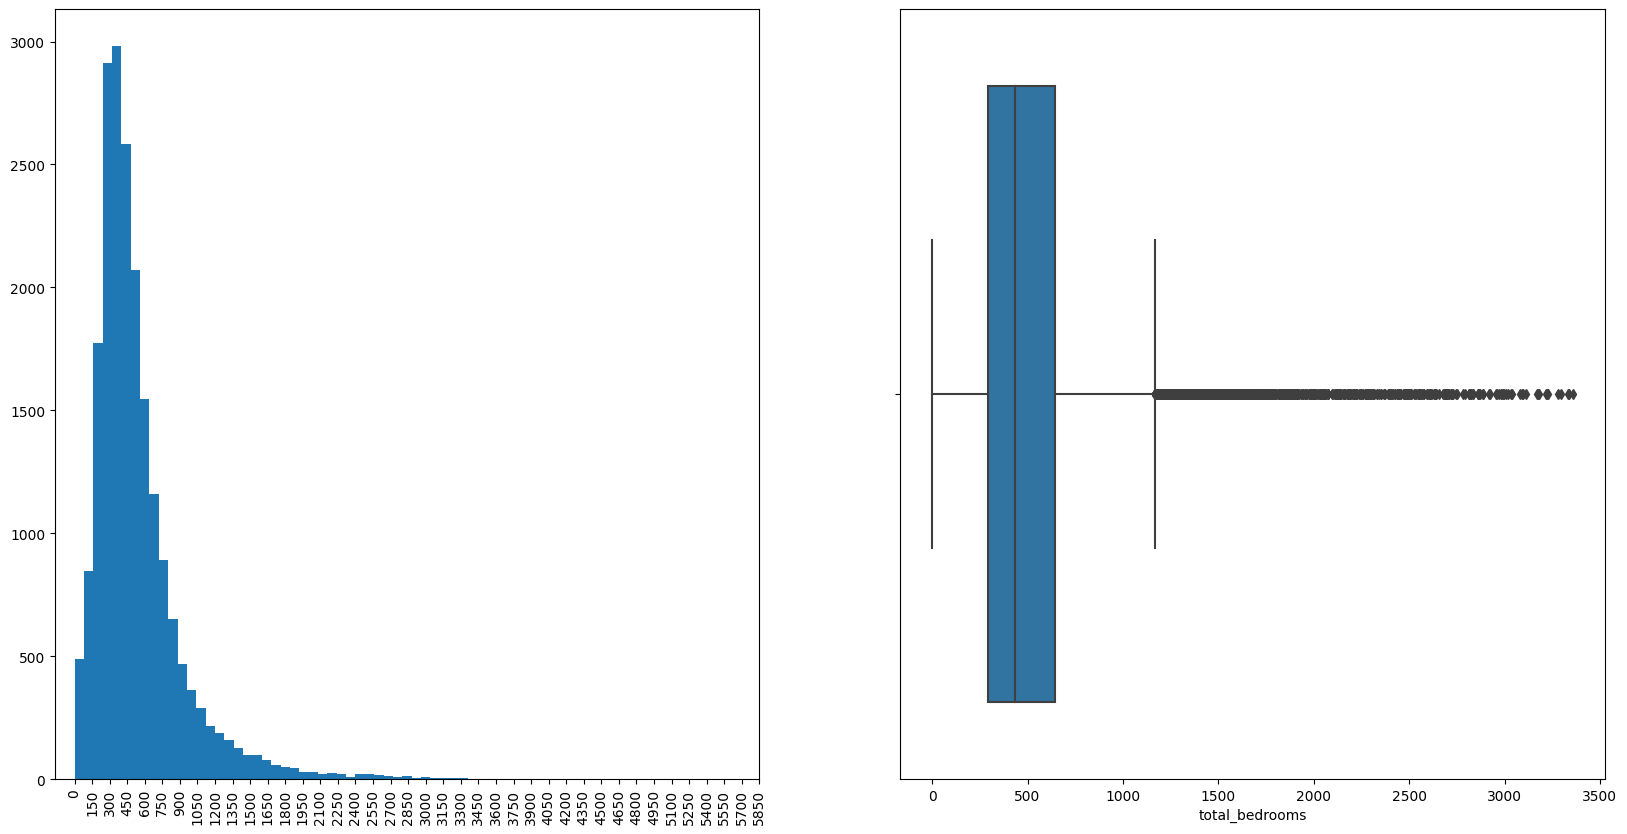

In [70]:
out_index2 = house_data[house_data["total_bedrooms"] > 3400].index
house_data = house_data.drop(out_index2 , axis = 0) 
plt.figure(figsize = [20,10])
plt.subplot(1 , 2 , 1)

bins = np.arange(0 , house_data["total_bedrooms"].max() + 80 , 80)
plt.hist(data = house_data , x = "total_bedrooms" , bins = bins)
plt.xticks(np.arange(0 , 6000 , 150))
plt.xticks(rotation = 90);

plt.subplot(1 , 2 , 2)

sns.boxplot(x = house_data["total_bedrooms"])
house_data["total_bedrooms"].describe()


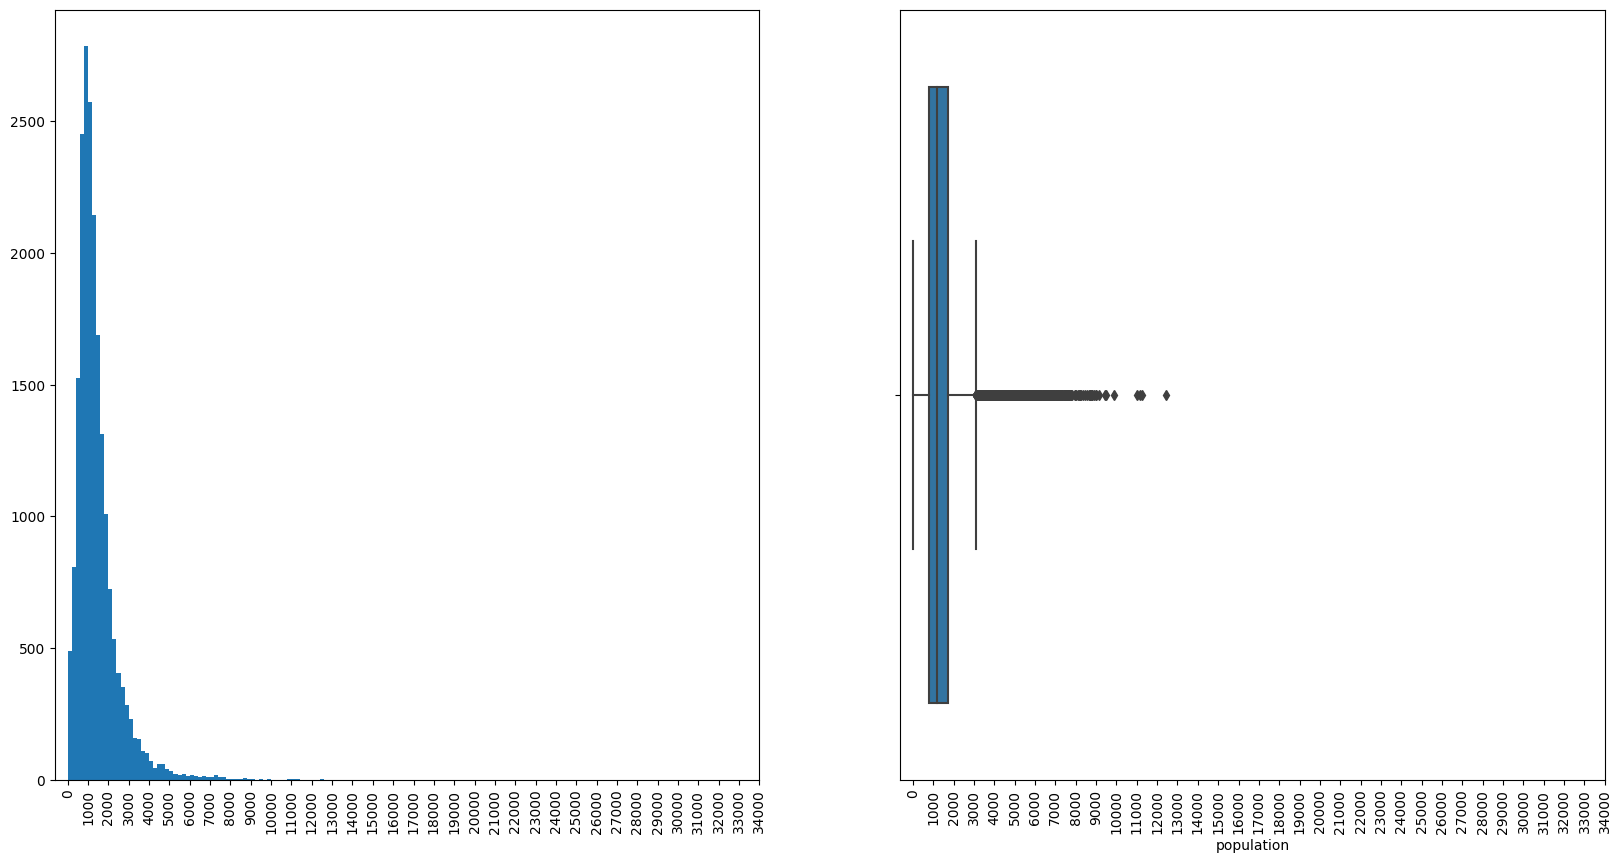

In [71]:
plt.figure(figsize = [20,10])
plt.subplot(1 , 2 , 1)

bins = np.arange(0 , house_data["population"].max() + 200 , 200)
plt.hist(data = house_data , x = "population" , bins = bins)
plt.xticks(np.arange(0 , 35000 , 1000))
plt.xticks(rotation = 90);

plt.subplot(1 , 2 , 2)

sns.boxplot(x = house_data["population"])
plt.xticks(np.arange(0 , 35000 , 1000))
plt.xticks(rotation = 90);

count    20377.000000
mean      1400.074741
std        995.873349
min          3.000000
25%        786.000000
50%       1164.000000
75%       1717.000000
max       8997.000000
Name: population, dtype: float64

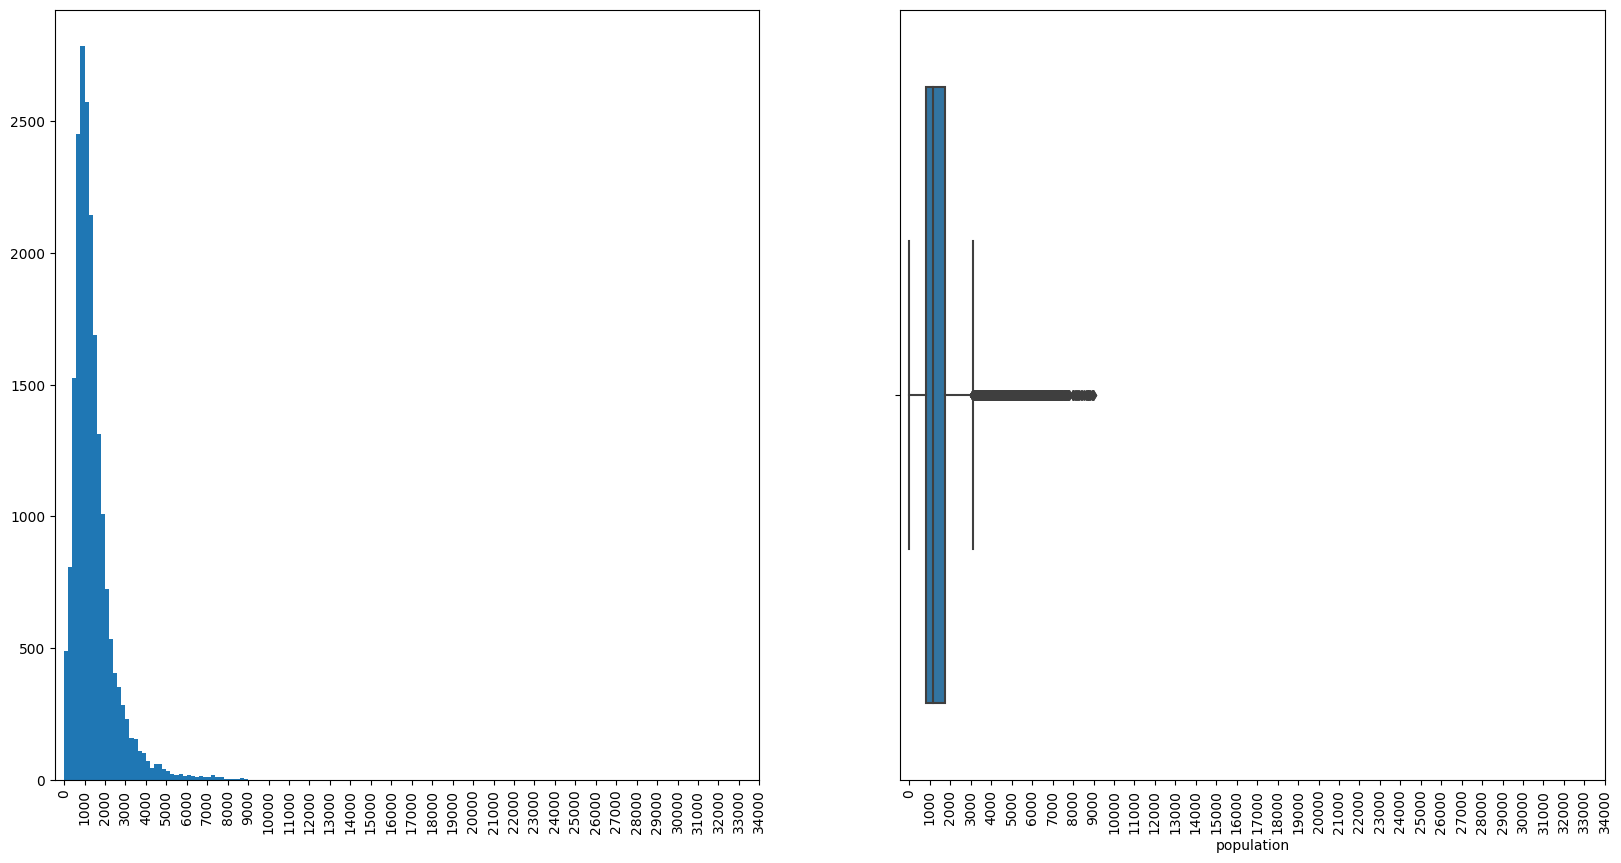

In [72]:
out_index3 = house_data[house_data["population"] > 9000].index
house_data = house_data.drop(out_index3 , axis = 0) 
plt.figure(figsize = [20,10])
plt.subplot(1 , 2 , 1)

bins = np.arange(0 , house_data["population"].max() + 200 , 200)
plt.hist(data = house_data , x = "population" , bins = bins)
plt.xticks(np.arange(0 , 35000 , 1000))
plt.xticks(rotation = 90);

plt.subplot(1 , 2 , 2)

sns.boxplot(x = house_data["population"])
plt.xticks(np.arange(0 , 35000 , 1000))
plt.xticks(rotation = 90);house_data["population"].describe()

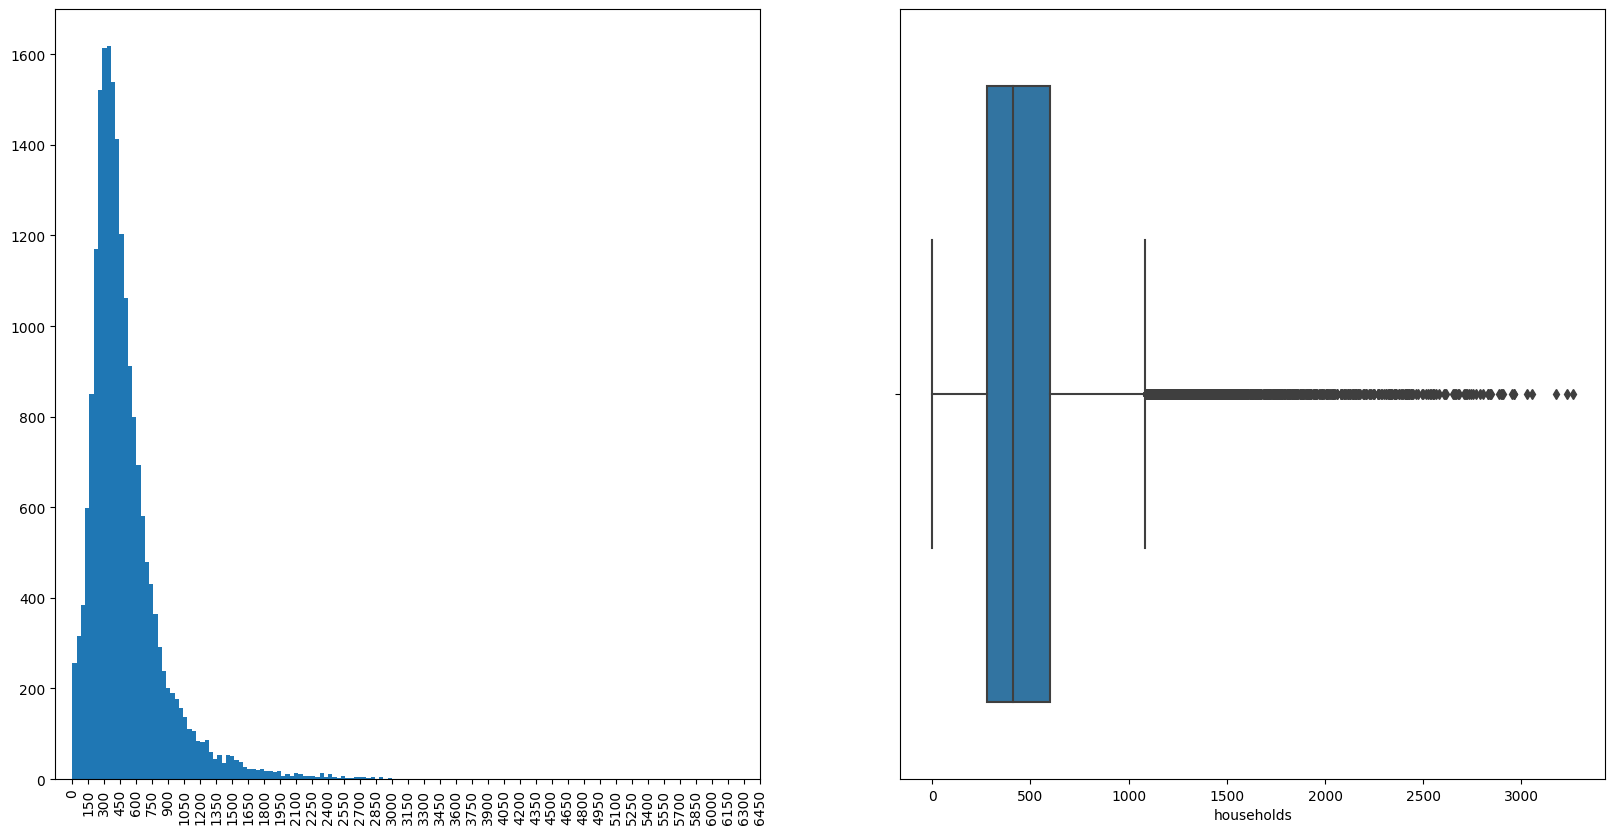

In [73]:
plt.figure(figsize = [20,10])
plt.subplot(1 , 2 , 1)

bins = np.arange(0 , house_data["households"].max() + 40 , 40)
plt.hist(data = house_data , x = "households" , bins = bins)
plt.xticks(np.arange(0 , 6500 , 150))
plt.xticks(rotation = 90);

plt.subplot(1 , 2 , 2)
sns.boxplot(x = house_data["households"]);

count    20374.000000
mean       490.673113
std        342.979414
min          1.000000
25%        279.000000
50%        409.000000
75%        601.000000
max       3052.000000
Name: households, dtype: float64

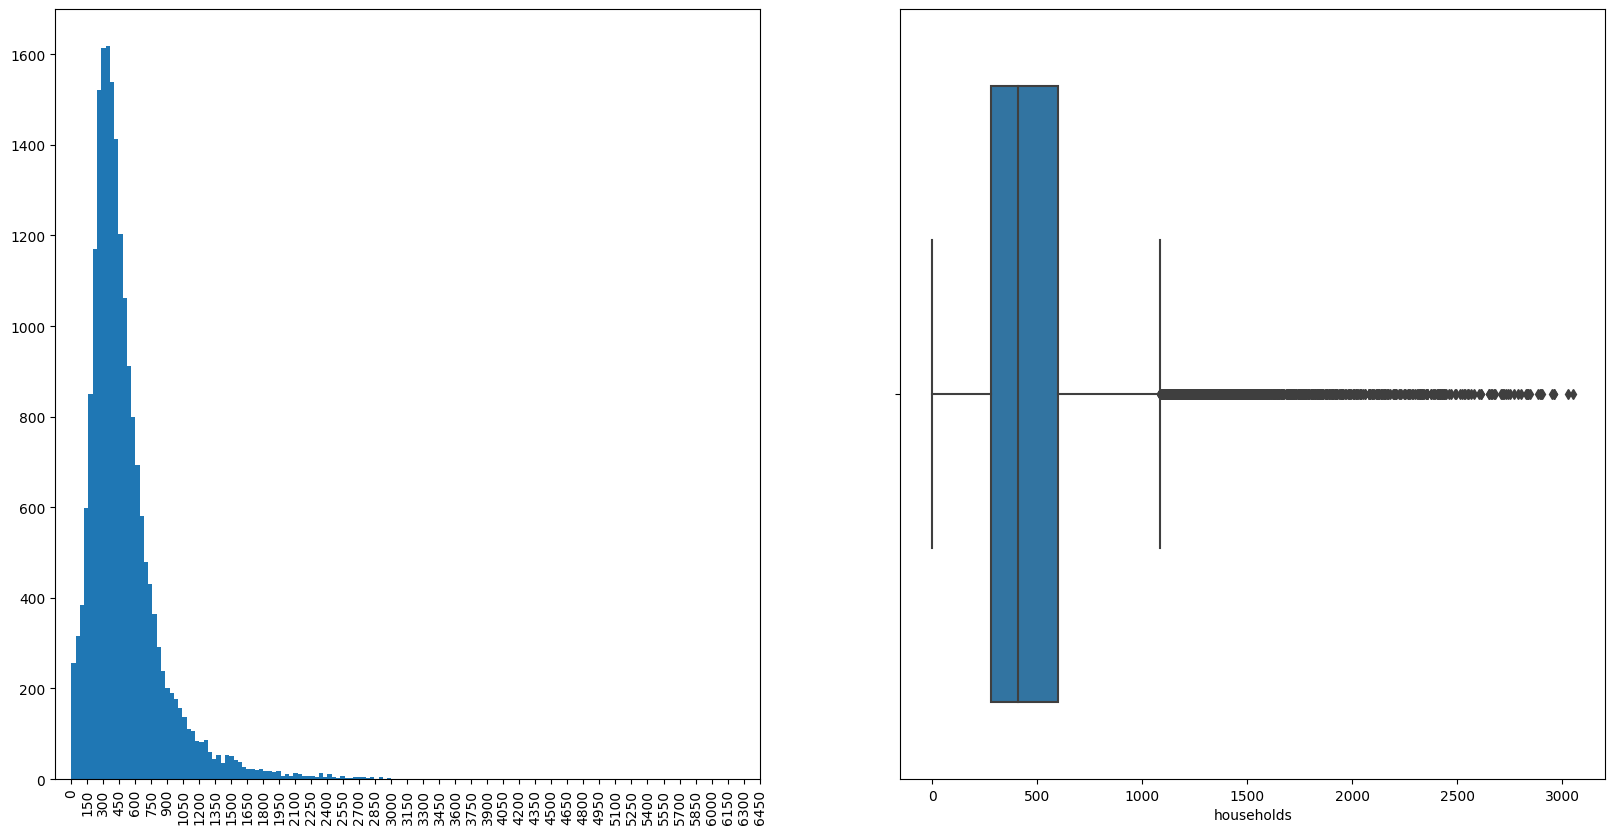

In [74]:
out_index4 = house_data[house_data["households"] > 3150].index
house_data = house_data.drop(out_index4 , axis = 0) 
plt.figure(figsize = [20,10])
plt.subplot(1 , 2 , 1)

bins = np.arange(0 , house_data["households"].max() + 40 , 40)
plt.hist(data = house_data , x = "households" , bins = bins)
plt.xticks(np.arange(0 , 6500 , 150))
plt.xticks(rotation = 90);

plt.subplot(1 , 2 , 2)
sns.boxplot(x = house_data["households"]);house_data["households"].describe()

<Axes: xlabel='median_income'>

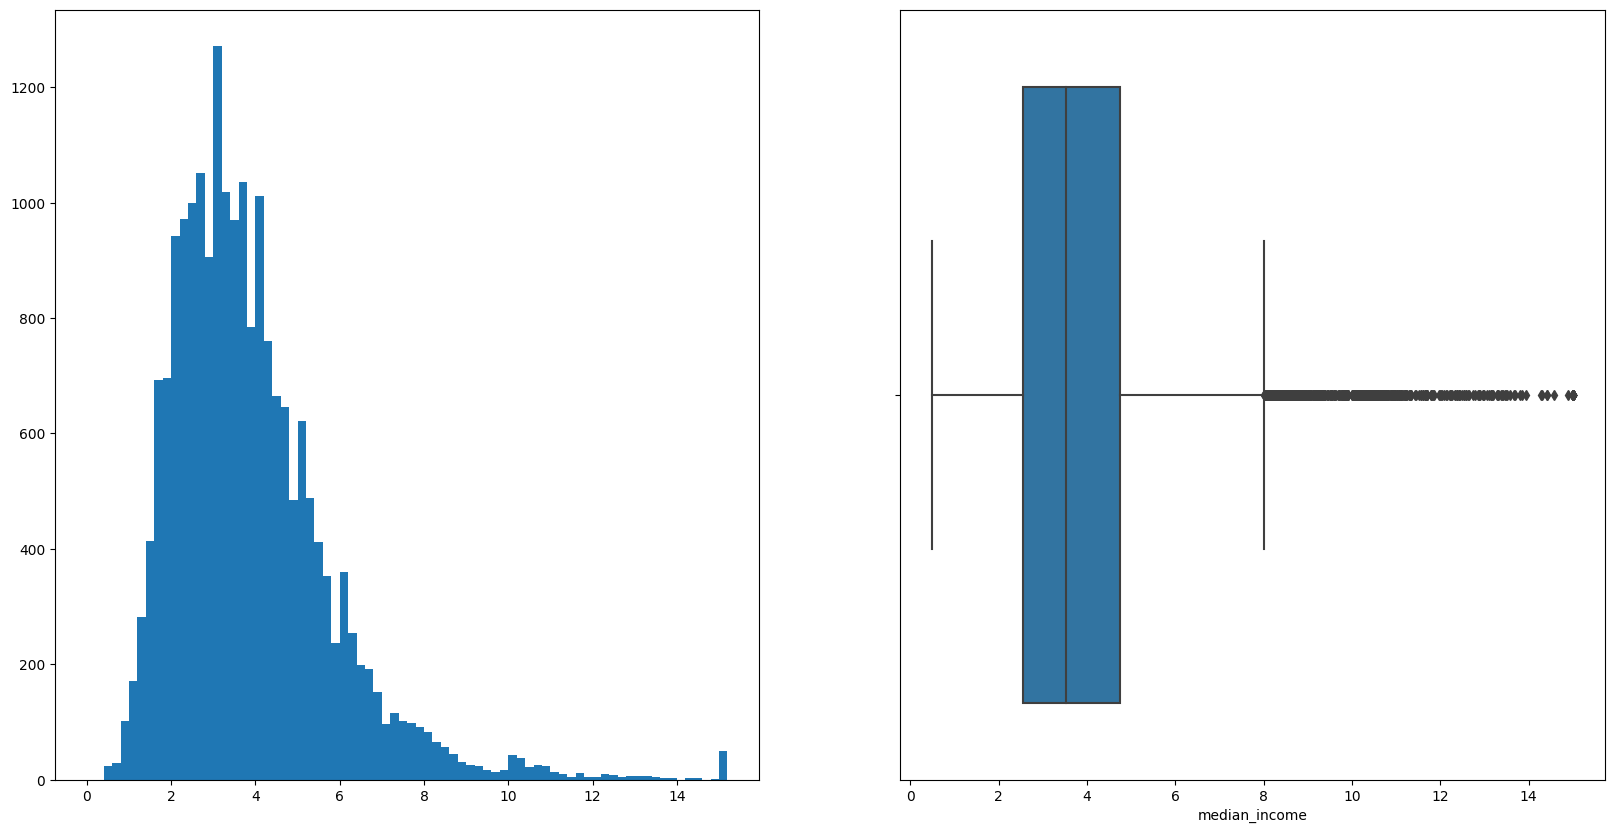

In [75]:
plt.figure(figsize = [20,10])
plt.subplot(1 , 2 , 1)

bins = np.arange(0 , house_data["median_income"].max() + 0.2 , 0.2)
plt.hist(data = house_data , x = "median_income" , bins = bins);

plt.subplot(1 , 2 , 2)

sns.boxplot(x = house_data["median_income"])

<Axes: xlabel='median_income'>

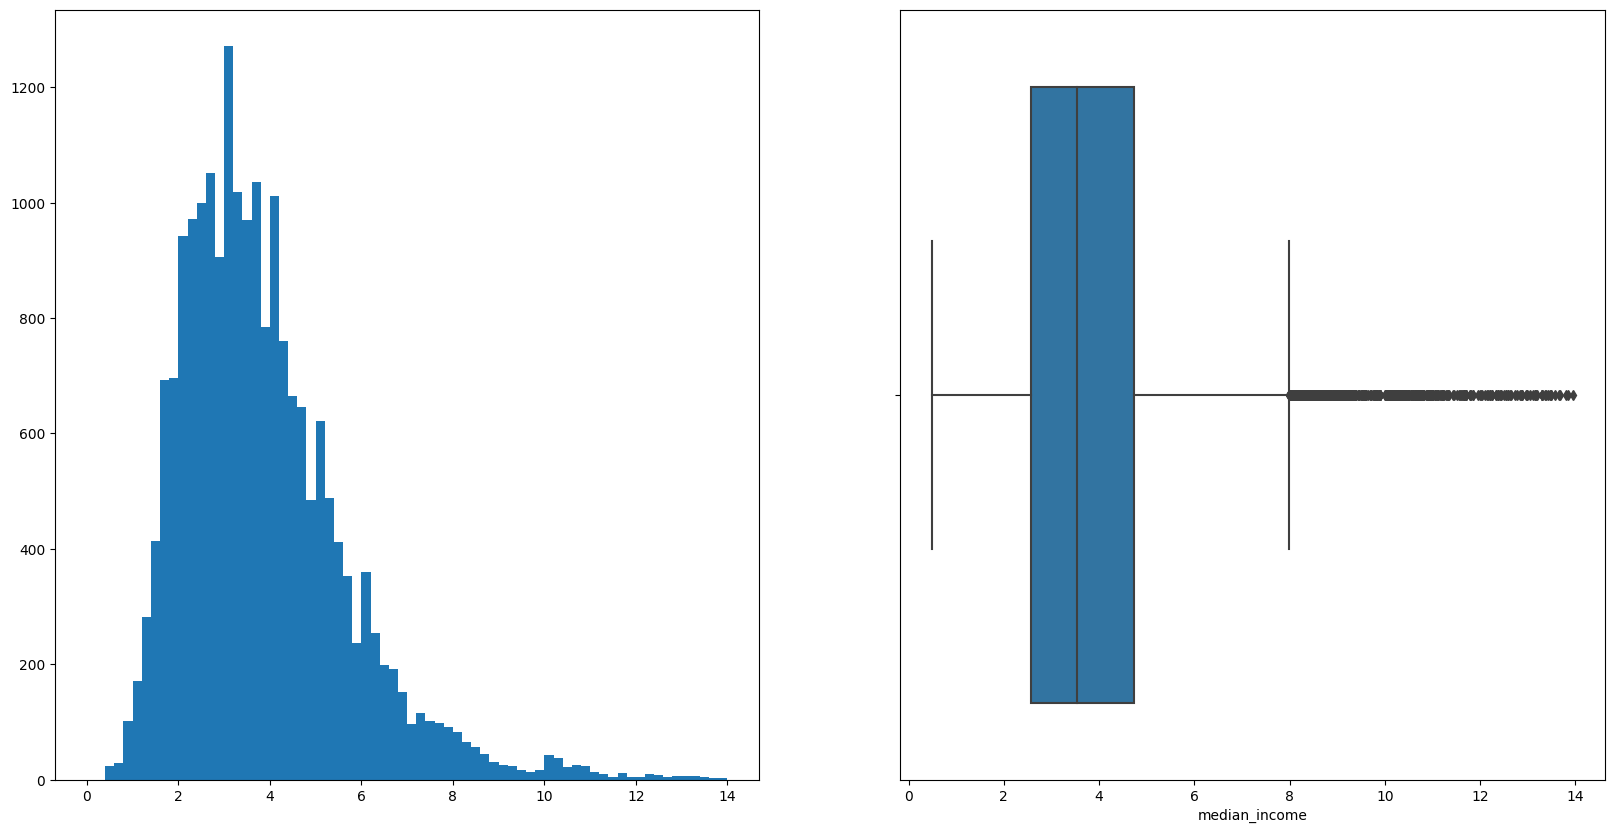

In [76]:
out_index5 = house_data[house_data["median_income"] > 14].index
house_data = house_data.drop(out_index5 , axis = 0) 
plt.figure(figsize = [20,10])
plt.subplot(1 , 2 , 1)

bins = np.arange(0 , house_data["median_income"].max() + 0.2 , 0.2)
plt.hist(data = house_data , x = "median_income" , bins = bins);

plt.subplot(1 , 2 , 2)

sns.boxplot(x = house_data["median_income"])

<Axes: xlabel='median_house_value'>

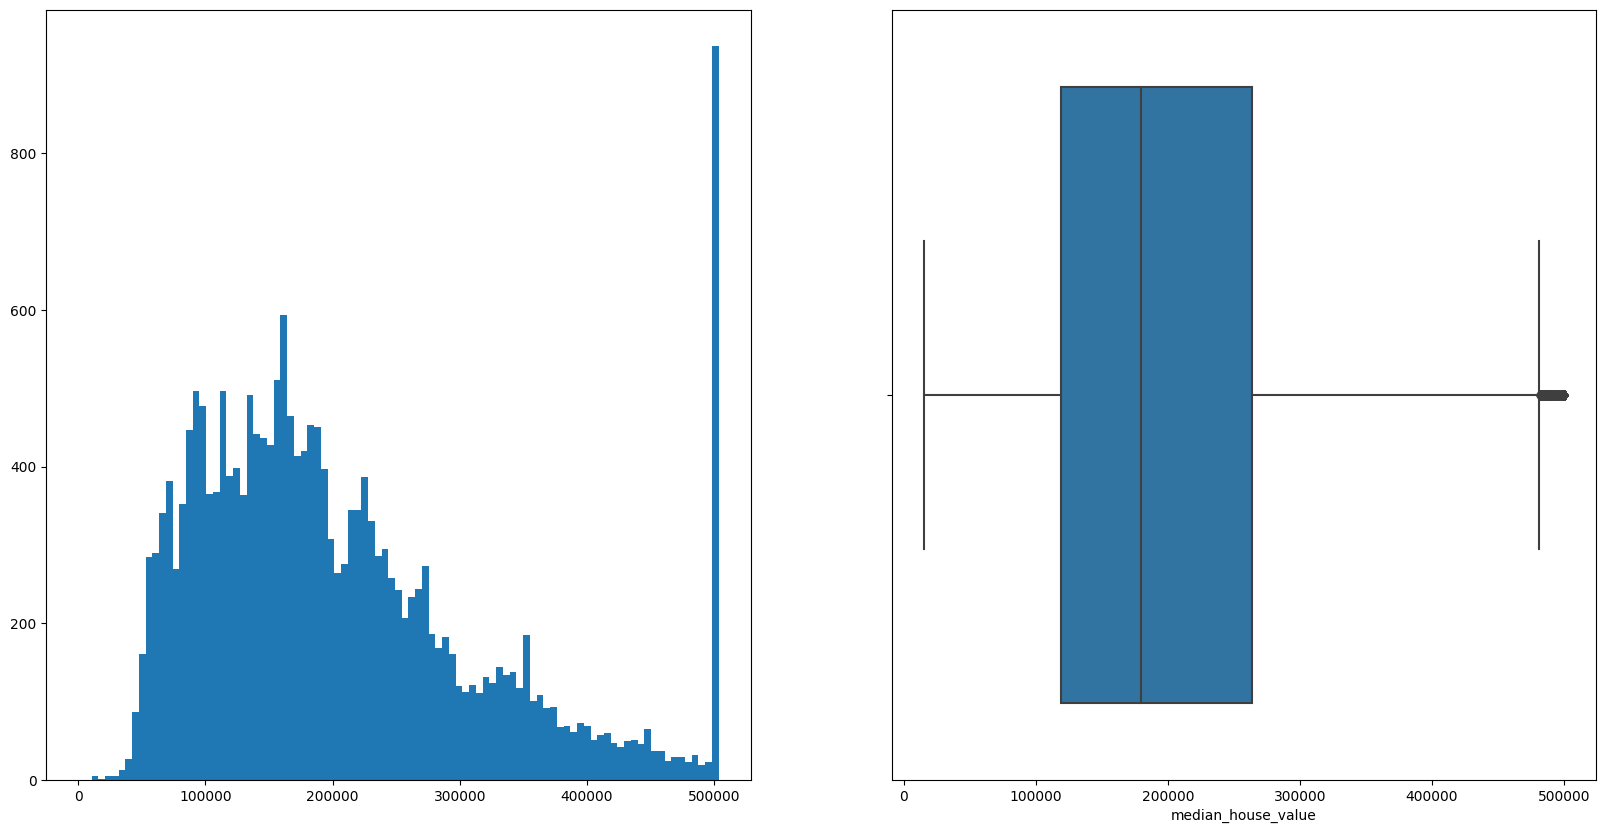

In [77]:
plt.figure(figsize = [20,10])
plt.subplot(1 , 2 , 1)

bins = np.arange(0 , house_data["median_house_value"].max() + 5300 , 5300)
plt.hist(data = house_data , x = "median_house_value" , bins = bins);

plt.subplot(1 , 2 , 2)

sns.boxplot(x = house_data["median_house_value"])

### Check For duplicated

In [78]:
house_data.duplicated().sum()

0

In [79]:
house_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     8967
INLAND        6471
NEAR OCEAN    2611
NEAR BAY      2264
ISLAND           5
Name: count, dtype: int64

### Feature Engineering

In [80]:
house_data = house_data.join(pd.get_dummies(house_data.ocean_proximity).astype(int)).drop(["ocean_proximity"], axis=1)

In [81]:
house_data["bedrooms_ratio"] = house_data["total_bedrooms"] / house_data["total_rooms"]
house_data["households_rooms"] = house_data["total_rooms"] / house_data["households"]

# Data Exploration (EDA)

In [82]:
house_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,households_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,0.172096,6.281853
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0,0.231774,4.761658
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0,0.192899,4.931907
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,0,1,0,0.221327,4.797527
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0,0.260274,4.294118
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,0,1,0,0.199211,4.970588


In [83]:
house_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,households_rooms
longitude,1.000000,-0.924584,-0.108206,0.039549,0.066650,0.105438,0.053225,-0.016686,-0.046549,0.320599,-0.055380,0.009545,-0.474958,0.047542,0.093708,-0.028190
latitude,-0.924584,1.000000,0.011120,-0.032598,-0.066694,-0.117290,-0.072621,-0.079758,-0.144017,-0.446736,0.351157,-0.016722,0.358686,-0.162489,-0.115726,0.108322
housing_median_age,-0.108206,0.011120,1.000000,-0.368447,-0.319418,-0.299851,-0.299998,-0.136753,0.102995,0.045069,-0.236732,0.017173,0.256118,0.021074,0.139388,-0.155175
total_rooms,0.039549,-0.032598,-0.368447,1.000000,0.919721,0.843344,0.908685,0.228841,0.151066,-0.009147,0.027598,-0.008231,-0.016602,-0.008852,-0.203863,0.142791
total_bedrooms,0.066650,-0.066694,-0.319418,0.919721,1.000000,0.872823,0.977635,-0.004204,0.059051,0.016680,-0.011048,-0.004507,-0.012633,0.002721,0.097782,-0.002640
population,0.105438,-0.117290,-0.299851,0.843344,0.872823,1.000000,0.904585,0.010746,-0.024856,0.078132,-0.023916,-0.011577,-0.060826,-0.024900,0.046912,-0.085567
households,0.053225,-0.072621,-0.299998,0.908685,0.977635,0.904585,1.000000,0.020439,0.075619,0.042372,-0.045493,-0.009819,-0.003177,0.003911,0.075772,-0.091847
median_income,-0.016686,-0.079758,-0.136753,0.228841,-0.004204,0.010746,0.020439,1.000000,0.687575,0.169668,-0.239337,-0.009485,0.060213,0.025275,-0.622003,0.319013
median_house_value,-0.046549,-0.144017,0.102995,0.151066,0.059051,-0.024856,0.075619,0.687575,1.000000,0.257055,-0.485231,0.023858,0.162335,0.140353,-0.248358,0.144153
<1H OCEAN,0.320599,-0.446736,0.045069,-0.009147,0.016680,0.078132,0.042372,0.169668,0.257055,1.000000,-0.607595,-0.013945,-0.314744,-0.341301,0.080759,-0.102413


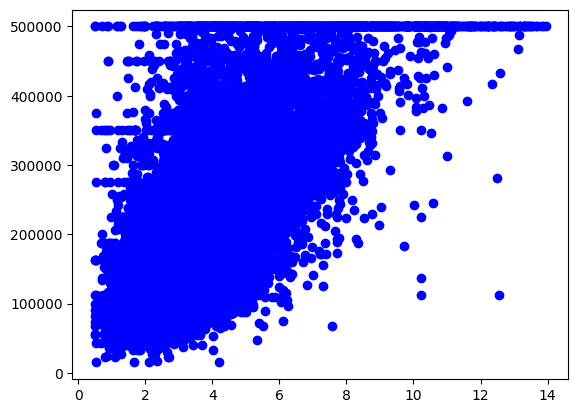

In [84]:
plt.scatter(house_data["median_income"], house_data["median_house_value"], c ="blue");

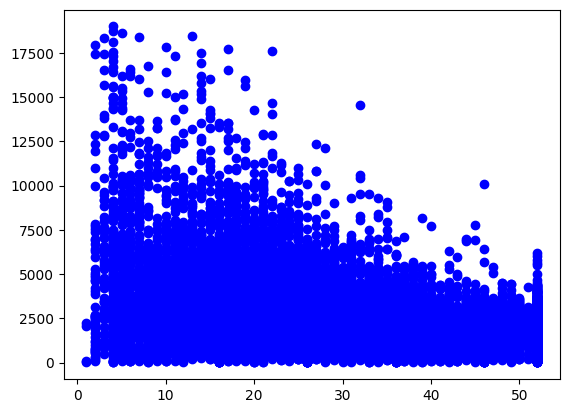

In [85]:
plt.scatter(house_data["housing_median_age"], house_data["total_rooms"], c ="blue");

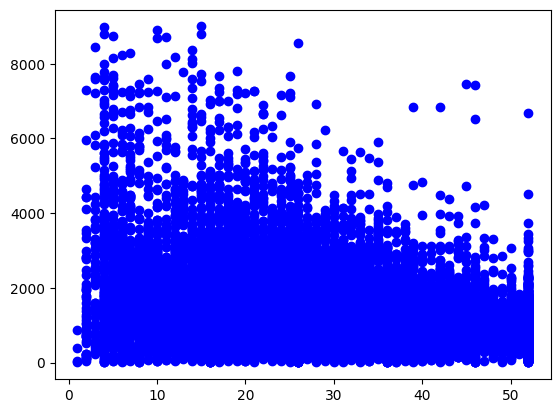

In [86]:
plt.scatter(house_data["housing_median_age"], house_data["population"], c ="blue");

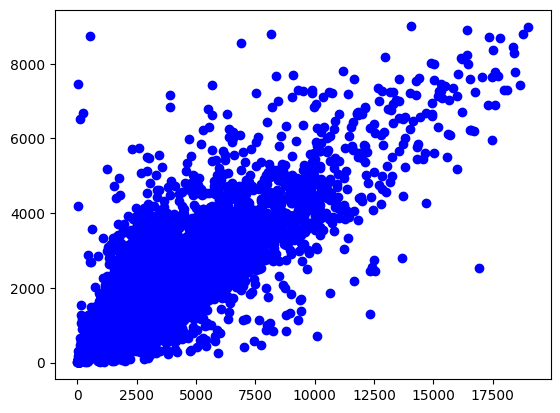

In [87]:
plt.scatter(house_data["total_rooms"], house_data["population"], c ="blue");

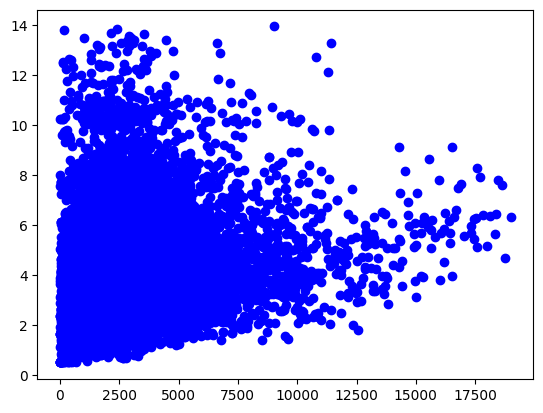

In [88]:
plt.scatter(house_data["total_rooms"], house_data["median_income"], c ="blue");

<Axes: xlabel='longitude', ylabel='latitude'>

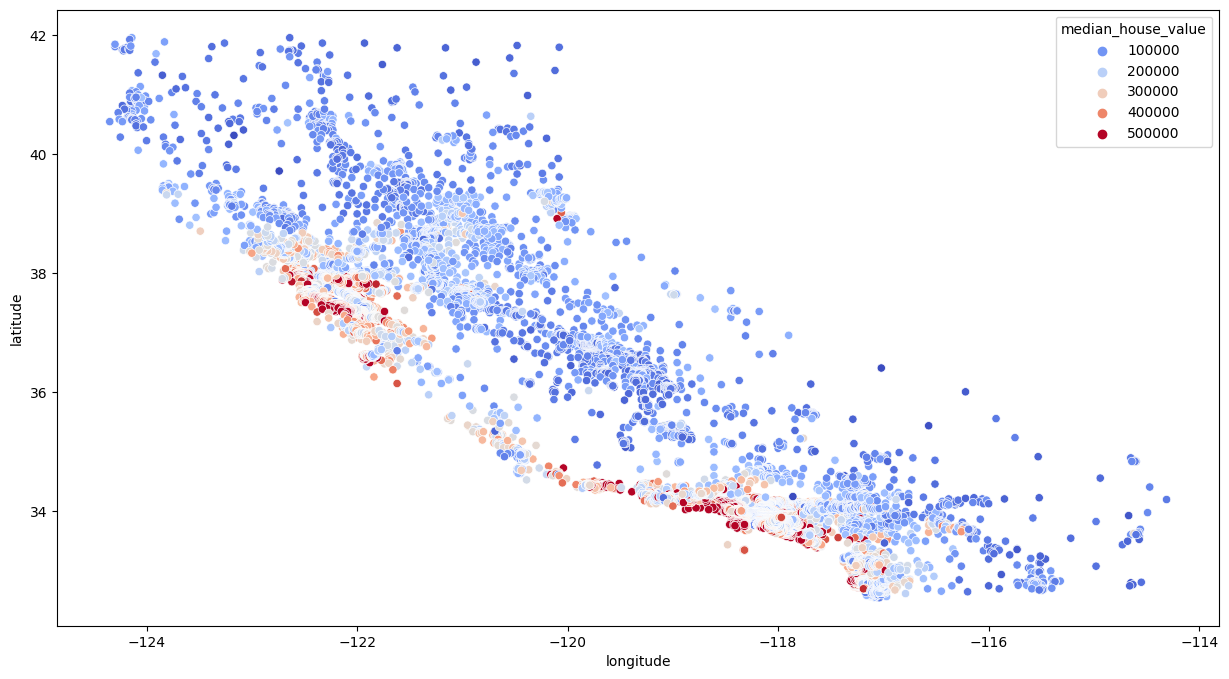

In [89]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = house_data["longitude"] , y = house_data["latitude"] , data = house_data ,hue = "median_house_value" , palette = "coolwarm")

# Linear Regression Model

### Prepare Data

In [90]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,households_rooms
count,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000
mean,-119.573072,35.636376,28.660006,2584.857811,528.709962,1400.953736,491.327493,3.839461,206080.027562,0.441333,0.318486,0.000246,0.111428,0.128507,0.213330,5.419927
std,2.003928,2.137672,12.553316,1925.660231,377.000395,993.329576,343.114712,1.811404,114660.809545,0.496558,0.465901,0.015686,0.314670,0.334661,0.057873,2.478427
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.846154
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.250000,280.000000,2.561525,119225.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175701,4.438596
50%,-118.500000,34.260000,29.000000,2122.000000,434.000000,1165.000000,409.000000,3.530900,179400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203390,5.225568
75%,-118.010000,37.720000,37.000000,3128.750000,644.750000,1718.000000,602.000000,4.733150,263900.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.239925,6.041782
max,-114.310000,41.950000,52.000000,19001.000000,3336.000000,8997.000000,3052.000000,13.947000,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,141.909091


#### Feature Scaling

In [91]:
scaler = StandardScaler()
house_data[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","bedrooms_ratio","households_rooms"]] = scaler.fit_transform(house_data[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","bedrooms_ratio","households_rooms"]])
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,households_rooms
count,2.031800e+04,2.031800e+04,2.031800e+04,2.031800e+04,2.031800e+04,2.031800e+04,2.031800e+04,2.031800e+04,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000,20318.000000,2.031800e+04,2.031800e+04
mean,-1.991954e-15,1.544324e-15,6.154913e-17,-8.952601e-17,-1.175029e-16,6.994219e-17,2.378035e-17,1.063121e-16,206080.027562,0.441333,0.318486,0.000246,0.111428,0.128507,-1.678613e-16,-2.000347e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,114660.809545,0.496558,0.465901,0.015686,0.314670,0.334661,1.000025e+00,1.000025e+00
min,-2.383840e+00,-1.448516e+00,-2.203457e+00,-1.341317e+00,-1.397142e+00,-1.407376e+00,-1.426169e+00,-1.843676e+00,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.958305e+00,-1.845479e+00
25%,-1.111309e+00,-7.982600e-01,-8.491994e-01,-5.903875e-01,-6.172823e-01,-6.178401e-01,-6.159243e-01,-7.055120e-01,119225.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.502168e-01,-3.959586e-01
50%,5.354972e-01,-6.438826e-01,2.708467e-02,-2.403691e-01,-2.512260e-01,-2.375441e-01,-2.399475e-01,-1.703477e-01,179400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.717652e-01,-7.842204e-02
75%,7.800229e-01,9.747408e-01,6.643822e-01,2.824515e-01,3.078058e-01,3.191832e-01,3.225604e-01,4.933802e-01,263900.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.595546e-01,2.509132e-01
max,2.626442e+00,2.953578e+00,1.859315e+00,8.525152e+00,7.446568e+00,7.647244e+00,7.463205e+00,5.580084e+00,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.359338e+01,5.507223e+01


#### Data Spliting

In [92]:
y = house_data['median_house_value']  
x = house_data.drop('median_house_value', axis=1) 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Training

In [93]:
model = LinearRegression()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

## Evaluate the Model

In [94]:
rmse_train = mean_squared_error(y_train, model.predict(x_train), squared=False)

rmse_test = mean_squared_error(y_test, model.predict(x_test), squared=False)

r2_train = r2_score(y_train, model.predict(x_train))
r2_test = r2_score(y_test, model.predict(x_test))

print(f"Training RMSE: {rmse_train:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}")
print(f"Training R²: {r2_train:.2f}")
print(f"Testing R²: {r2_test:.2f}")

Training RMSE: 66186.99
Testing RMSE: 68042.89
Training R²: 0.66
Testing R²: 0.66
